# Warehouse Optimization

## Initilization

In [54]:
import pandas as pd
import pandas_profiling
import numpy as np
data = pd.read_csv('ML_datafile.csv')
data.reset_index(drop=True, inplace=True)
data = data.drop(['Item No', 'Manufacturer No', 'Product Name', 'Date', 'STOCK TYPE', 'In Stock', 'List No',
                 'UPC Code', 'SaleRate','Blowout','Profit'], axis=1)
data.dtypes
data.head(10)

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,weight(lb),SaleRateNew
0,Supermicro,Power Cable,Component,Cable,Power Cable,10.25,7.6875,1,2.5,1.00,0.0
1,ASUS,Bag & Sleeve,PC & Laptop,Accessory,Bag & Sleeve,9.23,4.2300,1,2.5,0.50,0.0
2,AMD,Others,Component,CPU / Processor,Desktop CPU,76.88,57.6600,1,2.5,0.74,0.0
3,QNAP,DDR3 1333,Component,DRAM Memory,Notebook DRAM,76.88,57.6600,1,0.0,0.10,0.0
4,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,92.76,69.5700,1,2.5,0.50,0.0
5,SK hynix,Server DDR3,Component,DRAM Memory,Server DRAM,186.55,139.9125,1,0.0,0.08,0.0
6,APC,Battery Systems,Component,Power Protection / UPS,Battery Systems,263.94,197.9550,1,10.0,28.00,0.0
7,Supermicro,CPU on Board Combo,Component,Motherboard,CPU on Board Combo,262.40,196.8000,1,2.5,5.00,0.0
8,ASUS,Speaker & Headset,Component,Multimedia,Speaker & Headset,263.42,197.5650,1,2.5,6.50,0.0
9,ASUS,Desktop Barebone,Component,Barebone,Desktop Barebone,480.72,360.5400,1,2.5,0.50,0.0


## Exploratory Analysis

In [45]:
# To get some basic ideas about the data
def summerize_data(df, columns):
    for column in columns:
        print(column)
        if df.dtypes[column] == np.object: # Categorical data
            print(df[column].value_counts())
        else:
            print(df[column].describe())
            
        print('\n')
    
columns = ["Price(USD)", "Inventory", "weight(lb)", "SaleRateNew"]
summerize_data(data, columns)

Price(USD)
count    4200.000000
mean      284.684874
std       610.347111
min         0.210000
25%        28.190000
50%        84.050000
75%       242.412500
max      7021.250000
Name: Price(USD), dtype: float64


Inventory
count    4200.000000
mean       43.329524
std        90.595148
min         1.000000
25%         5.000000
50%        19.000000
75%        51.000000
max      1002.000000
Name: Inventory, dtype: float64


weight(lb)
count    4200.000000
mean        6.472921
std        13.758992
min         0.000000
25%         0.350000
50%         1.545000
75%         5.490000
max       174.000000
Name: weight(lb), dtype: float64


SaleRateNew
count    4200.000000
mean        0.913433
std         1.138135
min         0.000000
25%         0.125000
50%         0.772727
75%         1.181818
max         8.644444
Name: SaleRateNew, dtype: float64




# Missing Data Points Per Feature

In [46]:
data.isnull().sum()

Manufacturer         0
Category             1
Category Path 1      1
Category Path 2      1
Category Path 3    296
Price(USD)           0
Cost price           0
Inventory            0
Shipping             0
weight(lb)           0
SaleRateNew          0
dtype: int64

## Graphs

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import norm 
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

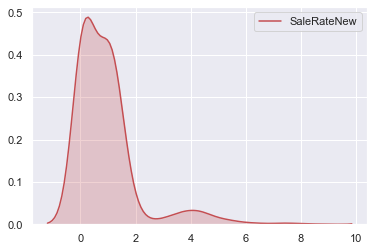

In [21]:
sns.kdeplot(data["SaleRateNew"],bw=0.4, shade=True, color="r")

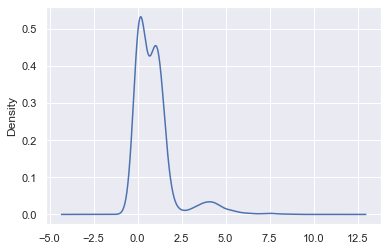

In [20]:
data["SaleRateNew"].plot.kde(bw_method=0.3)

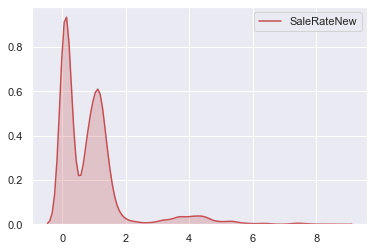

In [22]:
sns.kdeplot(data["SaleRateNew"], shade=True, color="r")

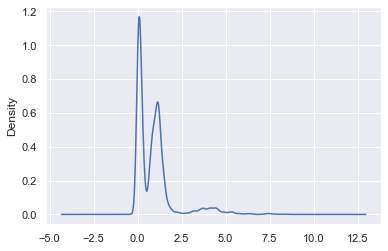

In [23]:
data["SaleRateNew"].plot.kde(bw_method=0.1)

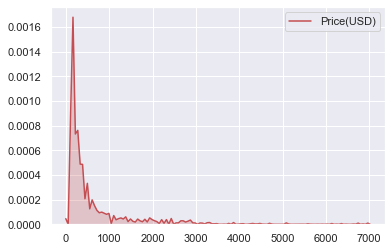

In [24]:
sns.kdeplot(data["Price(USD)"],bw=0.4, shade=True, color="r")

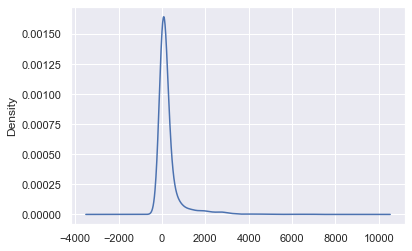

In [25]:
data["Price(USD)"].plot.kde(bw_method=0.3)

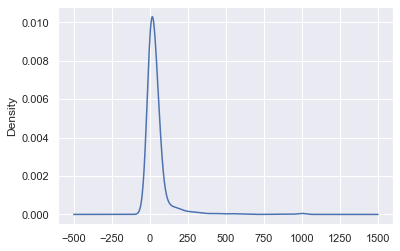

In [26]:
data["Inventory"].plot.kde(bw_method=0.3)

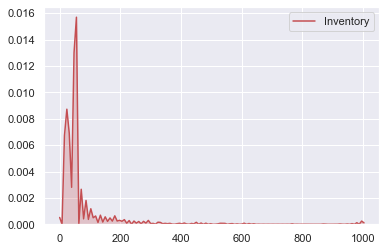

In [27]:
sns.kdeplot(data["Inventory"],bw=0.4, shade=True, color="r")

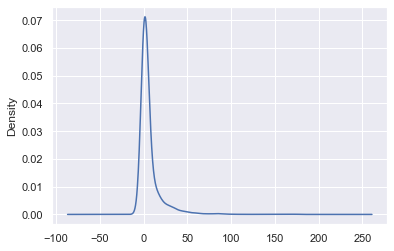

In [28]:
data[ "weight(lb)"].plot.kde(bw_method=0.3)

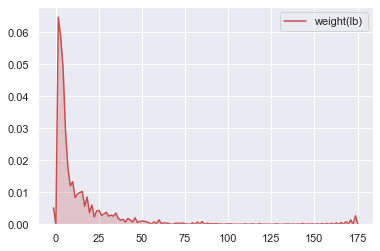

In [29]:
sns.kdeplot(data["weight(lb)"],bw=0.4, shade=True, color="r")

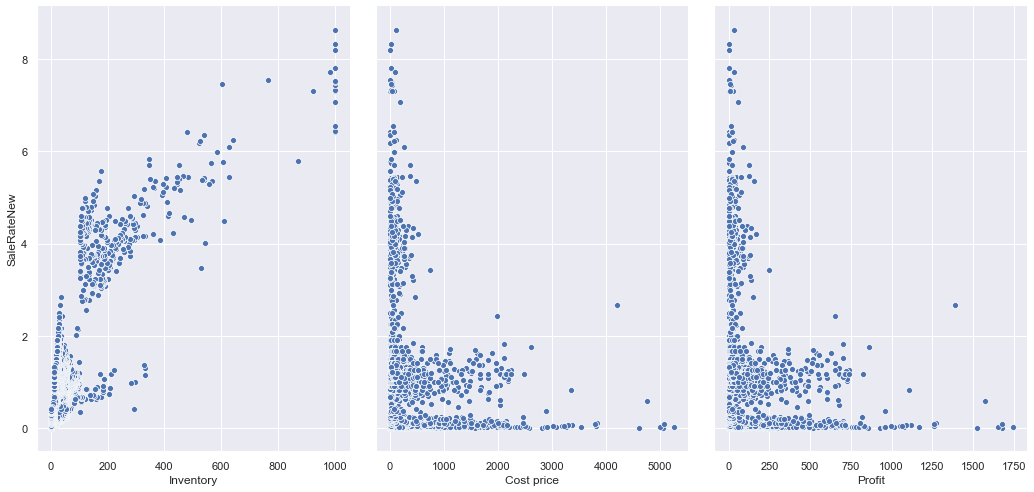

In [32]:
sns.pairplot(data, x_vars=['Inventory','Cost price','Profit'], y_vars='SaleRateNew', size=7, aspect=0.7)

## Correlation matrix

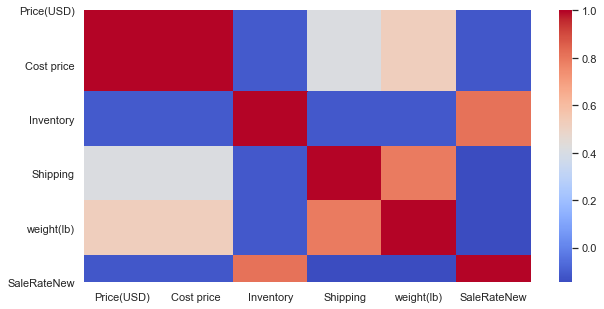

In [55]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap='coolwarm');
plt.savefig('heatmap.jpeg', dpi = 1000)



# Relationship with categorical values

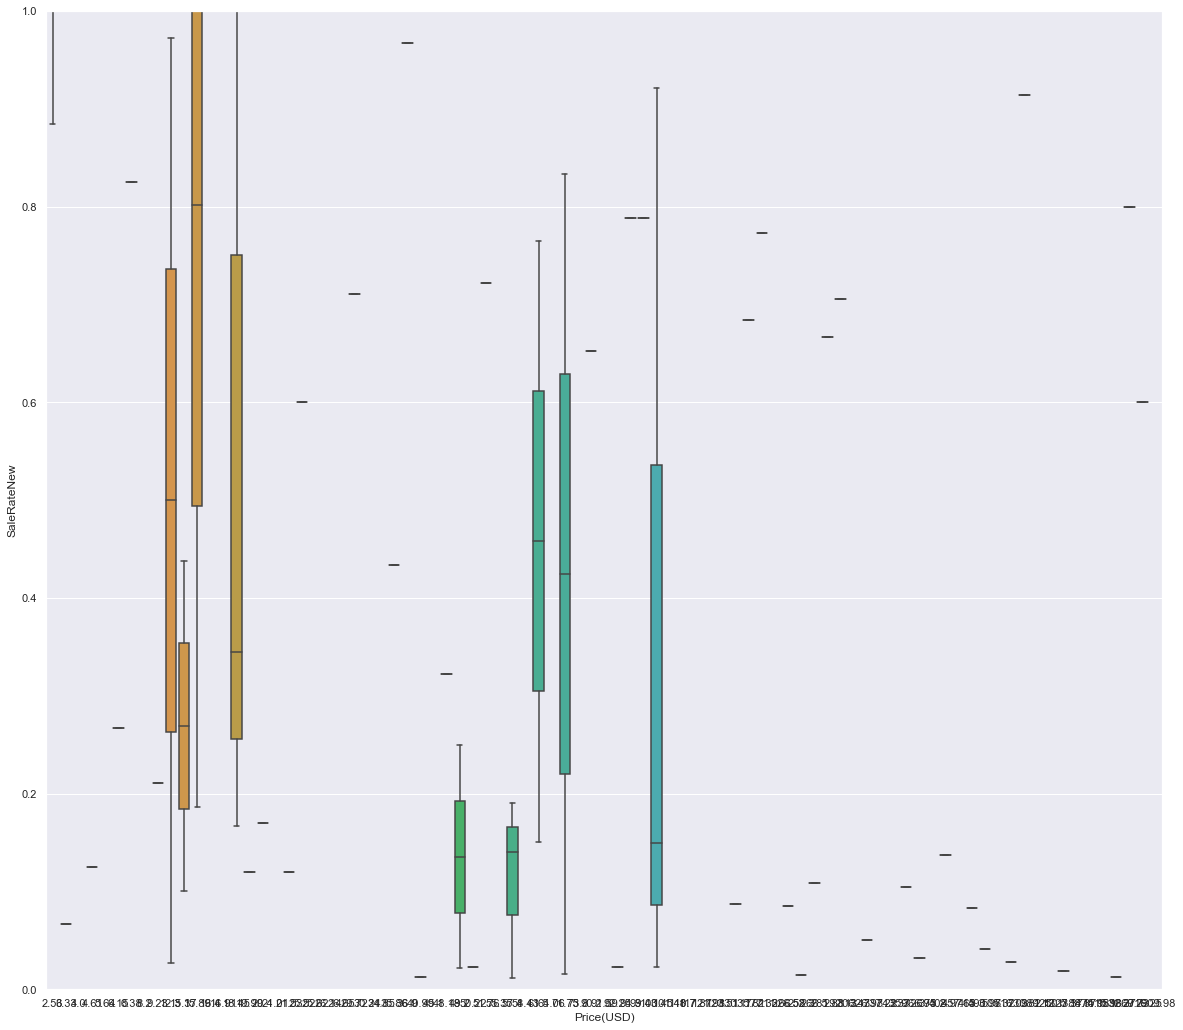

In [39]:
#box plot overallqual/saleprice
box_plot_df = data.sample(n=100, random_state=1)
var = 'Price(USD)'
box_plot_df = pd.concat([box_plot_df['SaleRateNew'], box_plot_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 18))
fig = sns.boxplot(x=var, y="SaleRateNew", data=box_plot_df)
fig.axis(ymin=0, ymax=1);

In [12]:
#check profile report of the dataset
profile = pandas_profiling.ProfileReport(data)
profile.to_file("EDA.html")

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
